In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Manipulation

In [3]:
coffee_production = pd.read_csv(r'C:\Users\Lenovo\Desktop\Maven\Data+Viz+with+Matplotlib+&+Seaborn\Data Viz with Matplotlib & Seaborn\Data\coffee\total-production.csv', 

    index_col=0,              # Set the first column as the index

    parse_dates=True,         # Automatically parse the index as dates

    date_format='%m-%d-%y'    # Adjust this format if needed based on your data

).T

In [4]:
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.870,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.520,120.235,34603.3542,620.238,1185.480,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.790,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.0470,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [5]:
coffee_production.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1990 to 2018
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Angola                            29 non-null     float64
 1   Bolivia (Plurinational State of)  29 non-null     float64
 2   Brazil                            29 non-null     float64
 3   Burundi                           29 non-null     float64
 4   Ecuador                           29 non-null     float64
 5   Indonesia                         29 non-null     float64
 6   Madagascar                        29 non-null     float64
 7   Malawi                            29 non-null     float64
 8   Papua New Guinea                  29 non-null     float64
 9   Paraguay                          29 non-null     float64
 10  Peru                              29 non-null     float64
 11  Rwanda                            29 non-null     float64
 12  Timor-Lest

# Coffee Production Stats.

* Create a bar chart of the top 10 coffee producers by total production in 'total-production.csv', sorted from highest to lowest.

In [7]:
top10_producers = coffee_production.sum().sort_values(ascending=False).iloc[:10].round(2)

top10_producers.head()

total_production
Brazil       1190965.74
Viet Nam      439540.95
Colombia      345871.45
Indonesia     245116.77
Ethiopia      141542.89
dtype: float64

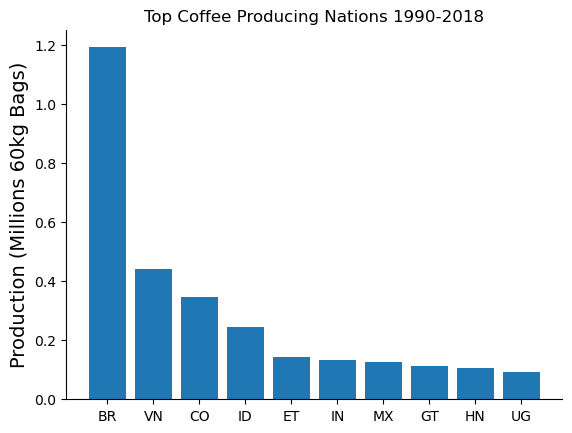

In [8]:
fig , ax = plt.subplots()

ax.bar (x =  top10_producers.index , height = top10_producers/1000000)

positions = list(range(10))
labels = ["BR", "VN", "CO", "ID", "ET", "IN", "MX", "GT", "HN", "UG"]

ax.set_title("Top Coffee Producing Nations 1990-2018")
ax.set_ylabel("Production (Millions 60kg Bags)", fontsize=14)

ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

# Top 5 over time

* Create a line chart with the top 5 nations over time.

In [10]:
top5 = coffee_production.loc[:, ["Brazil", "Viet Nam", "Colombia", "Indonesia", "Ethiopia"]]

top5.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
1990,27285.6286,1310.288,14396.000,7441.383,2909.451
1991,27293.4934,1437.848,17980.397,8493.196,2924.664
1992,34603.3542,2340.447,14946.878,5569.478,1825.171
1993,28166.9786,3020.216,11422.422,6743.288,2967.004
1994,28192.0470,3631.609,12964.000,5367.878,2762.730


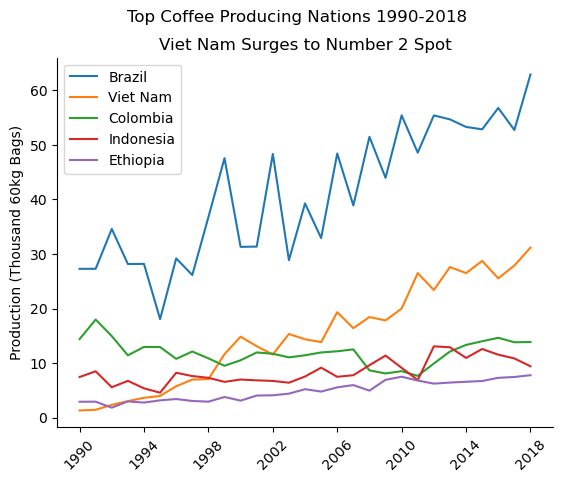

In [11]:
fig, ax = plt.subplots()

ax.plot(top5.index, coffee_production["Brazil"] / 1000, label="Brazil")
ax.plot(top5.index, coffee_production["Viet Nam"] / 1000, label="Viet Nam")
ax.plot(top5.index, coffee_production["Colombia"] / 1000, label="Colombia")
ax.plot(top5.index, coffee_production["Indonesia"] / 1000, label="Indonesia")
ax.plot(top5.index, coffee_production["Ethiopia"] / 1000, label="Ethiopia")

fig.suptitle("Top Coffee Producing Nations 1990-2018")
ax.set_title("Viet Nam Surges to Number 2 Spot")
ax.set_ylabel("Production (Thousand 60kg Bags)")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(top5.index[::4])
plt.xticks(rotation=45)

ax.legend()
plt.show()  

# COMPOSITION OVER TIME

* Our client is interested in looking at how Brazil's share of global coffee production has changed over time.

* Build a plot that global total production as well as Brazil's contribution to global production over time.

In [13]:
brazil_vs_others = (coffee_production
                    .assign(rest_of_world = coffee_production
                            .drop("Brazil", axis=1).sum(axis=1))
                    .loc[:, ["Brazil", "rest_of_world"]]
                    .astype({"Brazil": "float64"})
                   )

brazil_vs_others          

total_production,Brazil,rest_of_world
1990,27285.6286,65944.4310
1991,27293.4934,73973.1910
1992,34603.3542,63922.5450
1993,28166.9786,63597.6430
1994,28192.0470,65121.1470
1995,18060.2022,69257.2560
1996,29196.7430,74105.8530
1997,26148.0040,73713.1950
1998,36760.8533,72131.3598
1999,47577.8065,83805.9902


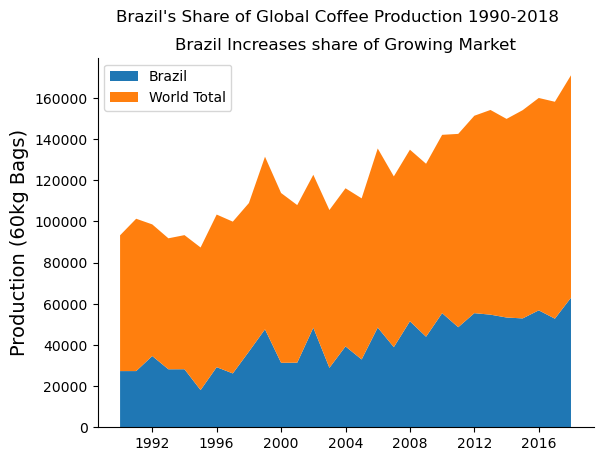

In [14]:
fig, ax = plt.subplots()

ax.stackplot(
    brazil_vs_others.index.astype("datetime64[ns]"), 
    brazil_vs_others["Brazil"], 
    brazil_vs_others["rest_of_world"],
    labels=["Brazil", "World Total"]
)


fig.suptitle("Brazil's Share of Global Coffee Production 1990-2018")
ax.set_title("Brazil Increases share of Growing Market")
ax.set_ylabel("Production (60kg Bags)", fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(loc="upper left")

# PRICE RELATIONSHIPS

* We want to explore how Brazil compares to its competitors in terms of production. Scatterplot  compares Brazil Vs. VietNam Production and one comparing Brazil to Venezuela.

Text(0.5, 0, 'Brazil Production (Millions 60kg Bags)')

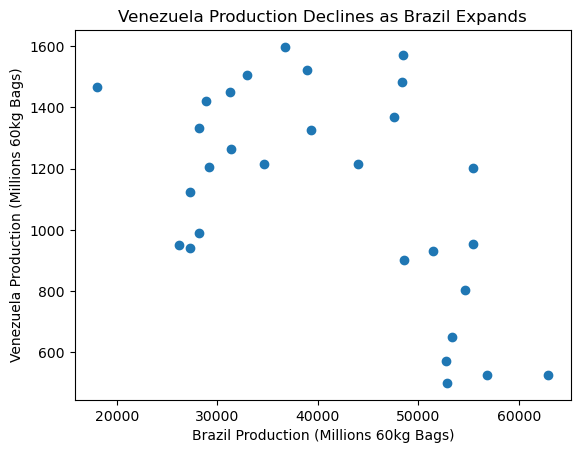

In [16]:
fig, ax = plt.subplots()

ax.scatter(
    coffee_production["Brazil"], 
    coffee_production["Venezuela"]
)

ax.set_title("Venezuela Production Declines as Brazil Expands")
ax.set_ylabel("Venezuela Production (Millions 60kg Bags)")
ax.set_xlabel("Brazil Production (Millions 60kg Bags)")

Text(0.5, 0, 'Brazil Production (Millions 60kg Bags)')

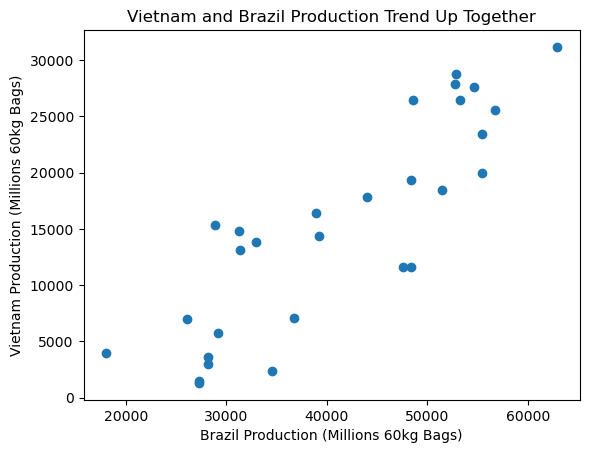

In [17]:
fig, ax = plt.subplots()

ax.scatter(
    coffee_production["Brazil"], 
    coffee_production["Viet Nam"], 
)

ax.set_title("Vietnam and Brazil Production Trend Up Together")
ax.set_ylabel("Vietnam Production (Millions 60kg Bags)")
ax.set_xlabel("Brazil Production (Millions 60kg Bags)")

# COMPOSITION OF COFFEE PRODUCTION

* Create a Pie chart with the top 5 producers, as well as the sum for the rest of countries.

* Finally, create two donut charts, one representing Brazil's share of global production in 1990, and one for Brazil's share in 2018.

In [19]:
coffee_production["Rest of World"] = coffee_production.drop(["Brazil", 
                                                             "Viet Nam", 
                                                             "Colombia", 
                                                             "Indonesia",
                                                             "Ethiopia",], axis=1).sum(axis=1)

coffee_production_top5_2018 = coffee_production.loc['2018', ["Brazil", 
                                                             "Viet Nam", 
                                                             "Colombia", 
                                                             "Indonesia",
                                                             "Ethiopia",
                                                             "Rest of World"
                                                            ]
                                                   ]

coffee_production_top5_2018

total_production
Brazil           62924.8836
Viet Nam         31174.0742
Colombia         13857.9620
Indonesia         9417.5942
Ethiopia          7776.2234
Rest of World    45786.0003
Name: 2018, dtype: float64

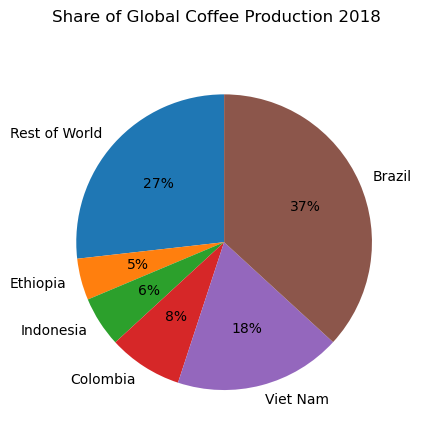

In [20]:
fig, ax = plt.subplots()

ax.pie(coffee_production_top5_2018[::-1],
       autopct="%.0f%%",
       labels=list(coffee_production_top5_2018.index[::-1]),
       startangle=90
      )

fig.suptitle("Share of Global Coffee Production 2018");

In [21]:
brazil_vs_others = (coffee_production
                    .assign(rest_of_world = coffee_production
                            .drop("Brazil", axis=1).sum(axis=1))
                    .loc[:, ["Brazil", "rest_of_world"]]
                    .astype({"Brazil": "float64"})
                   )


brazil_vs_others

total_production,Brazil,rest_of_world
1990,27285.6286,105831.7400
1991,27293.4934,117110.2770
1992,34603.3542,103163.1160
1993,28166.9786,103042.3560
1994,28192.0470,105516.0770
1995,18060.2022,113867.6570
1996,29196.7430,120052.3490
1997,26148.0040,117647.3100
1998,36760.8533,116119.3556
1999,47577.8065,136127.7035


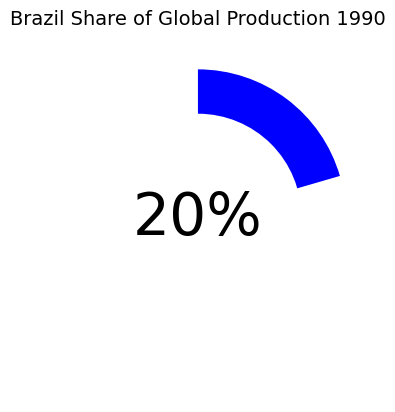

In [22]:
fig, ax = plt.subplots()

ax.pie(
    brazil_vs_others.iloc[0].sort_values(ascending=False),
    startangle=90,
    labels = ["", ""],
    pctdistance=.85,
    colors=["White", "Blue"]
)

hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(hole)

plt.text(
    0, 
    0, 
    f"{round((brazil_vs_others.loc['1990', 'Brazil'] / brazil_vs_others.loc['1990'].sum()*100))}%", 
    ha='center', 
    va='center', 
    fontsize=42
)
  

ax.set_title("Brazil Share of Global Production 1990", fontsize=14)

plt.show()

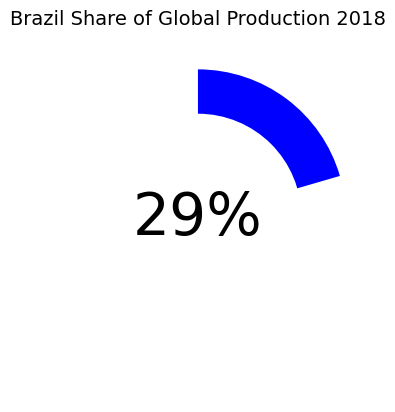

In [23]:
fig, ax = plt.subplots()

ax.pie(
    brazil_vs_others.iloc[0].sort_values(ascending=False),
    startangle=90,
    labels = ["", ""],
    pctdistance=.85,
    colors=["White", "Blue"]
)

hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(hole)

plt.text(
    0, 
    0, 
    f"{round((brazil_vs_others.loc['2018', 'Brazil'] / brazil_vs_others.loc['2018'].sum()*100))}%", 
    ha='center', 
    va='center', 
    fontsize=42
)
  

ax.set_title("Brazil Share of Global Production 2018", fontsize=14)

plt.show()

# Coffee Consumption Vs. Prices

* Comparing coffee prices with coffee consumption in the following countries. 

* Is there a relationship between coffee consumption and the price these countries pay?

* Plotting a dual axis bar chart of price vs consumption totals for these countries.

In [25]:
imports = pd.read_csv(r'C:\Users\Lenovo\Desktop\Maven\Data+Viz+with+Matplotlib+&+Seaborn\Data Viz with Matplotlib & Seaborn\Data\coffee\imports.csv')

imports.head()

,imports,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,1880.0,2058.0,2206.0,1836.0,1417.0,1231.0,1210.0,1294.0,1293.0,...,1309.0,1369.0,1452.0,1559.0,1555.0,NaN,NaN,NaN,NaN,NaN
1,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5916.0,5924.0,5828.0,5668.0,5502.0,NaN,NaN,NaN,NaN,NaN
2,Belgium/Luxembourg,2015.0,1746.0,1828.0,2063.0,2262.0,2401.0,2526.0,2544.0,3580.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bulgaria,268.0,200.0,182.0,397.0,463.0,515.0,272.0,294.0,342.0,...,523.0,528.0,482.0,560.0,609.0,NaN,NaN,NaN,NaN,NaN
4,Croatia,NaN,NaN,168.0,163.0,193.0,320.0,322.0,385.0,339.0,...,394.0,394.0,391.0,384.0,413.0,NaN,NaN,NaN,NaN,NaN


In [26]:
consumption = pd.read_csv(r'C:\Users\Lenovo\Desktop\Maven\Data+Viz+with+Matplotlib+&+Seaborn\Data Viz with Matplotlib & Seaborn\Data\coffee\imports.csv').set_index("imports").mean(axis = 1)

consumption.name = "imports"

consumption.head()

imports
Austria               1551.083333
Belgium               4639.533333
Belgium/Luxembourg    2329.444444
Bulgaria               397.250000
Croatia                349.136364
Name: imports, dtype: float64

In [27]:
prices = pd.read_csv(r"C:\Users\Lenovo\Desktop\Maven\Data+Viz+with+Matplotlib+&+Seaborn\Data Viz with Matplotlib & Seaborn\Data\coffee\retail-prices.csv")

prices.head()

,retail_prices,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,10.816777,10.088300,11.015453,10.971302,10.110375,11.434879,11.964680,9.646799,8.763797,...,15.342163,14.768212,18.366446,18.498896,19.028698,19.050773,16.423841,12.450331,13.730684,14.635762
1,Cyprus,6.247241,6.181015,6.335541,5.739514,7.019868,9.403974,9.116998,8.918322,10.176600,...,12.207506,11.501104,13.377483,14.039735,14.282561,14.304636,11.699779,11.699779,12.141280,12.781457
2,Denmark,8.410596,8.101545,8.366446,7.682119,9.823400,12.295806,10.618102,10.949227,10.860927,...,11.677704,12.008830,15.275938,14.834437,14.039735,14.194260,12.913907,10.905077,11.103753,11.699779
3,Finland,6.578366,6.004415,5.430464,4.282561,6.026490,8.763797,7.108168,7.726269,7.549669,...,7.748344,8.145695,11.832230,10.596026,9.470199,9.514349,8.609272,8.101545,9.050773,9.359823
4,France,8.233996,7.571744,5.099338,4.481236,5.298013,8.145695,7.284768,6.092715,6.136865,...,8.366446,7.991170,9.116998,8.653422,8.653422,8.322296,6.865342,7.196468,7.505519,8.123620


In [28]:
prices = pd.read_csv(r"C:\Users\Lenovo\Desktop\Maven\Data+Viz+with+Matplotlib+&+Seaborn\Data Viz with Matplotlib & Seaborn\Data\coffee\retail-prices.csv"
                    ).set_index("retail_prices").mean(axis = 1)

prices.head()

retail_prices
Austria    11.571135
Cyprus     10.437695
Denmark    10.494025
Finland     7.211692
France      6.850879
dtype: float64

In [29]:
#Merging both the dataframes(Prices & Consumption) together.

price_cons = (pd.DataFrame(prices)
              .merge(consumption,
                     left_on = prices.index,
                     right_on = consumption.index,
                     how = "inner"
                    )
              .sort_values(["imports"] ,  ascending = False)
             )

price_cons.columns = ["country" , "Price", "Imports" ]

price_cons["counrty"] = price_cons["country"].str.strip(" ")

price_cons

,country,Price,Imports,counrty
5,Germany,9.515110,16357.666667,Germany
11,Japan,21.472939,6862.275235,Japan
6,Italy,14.199589,6696.958333,Italy
4,France,6.850879,6512.458333,France
9,Spain,8.029992,4046.291667,Spain
7,Netherlands,8.931263,2928.125000,Netherlands
10,Sweden,8.054350,1620.625000,Sweden
0,Austria,11.571135,1551.083333,Austria
3,Finland,7.211692,1157.541667,Finland
2,Denmark,10.494025,991.791667,Denmark


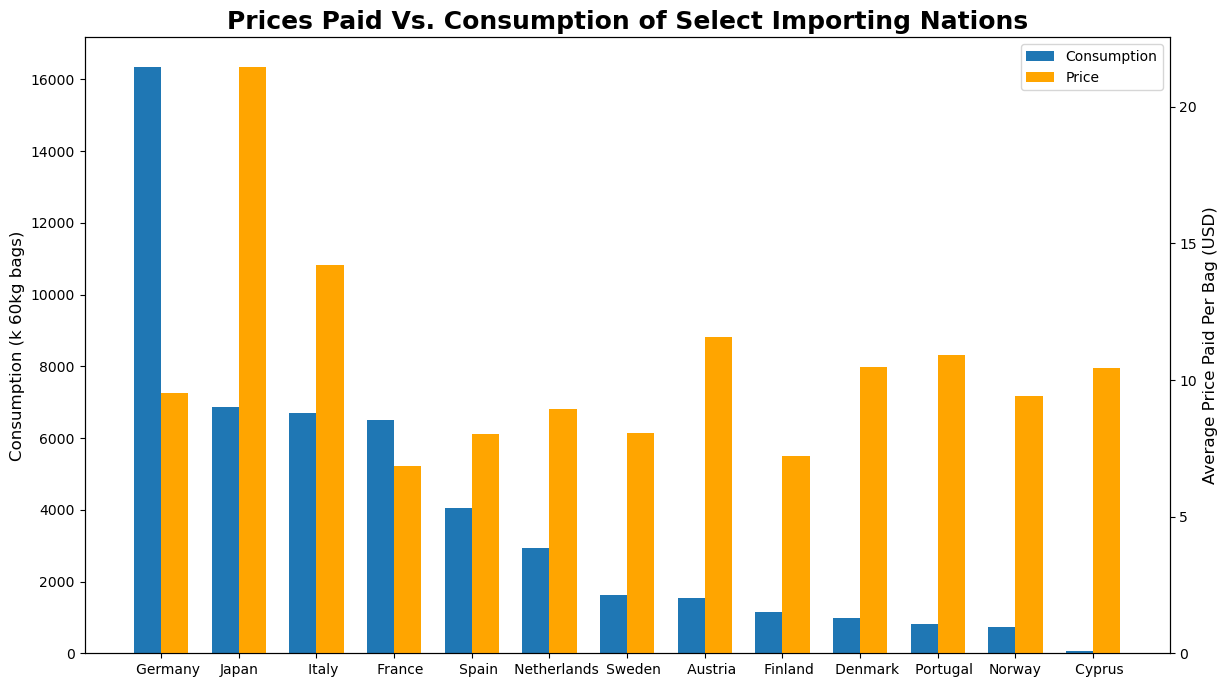

In [30]:
fig, ax = plt.subplots(figsize = (14,8))

width=.35
x=np.arange(0, len(price_cons["country"]))

bar1 = ax.bar(x-width/2, price_cons["Imports"], width=width)

ax.set_title("Prices Paid Vs. Consumption of Select Importing Nations", fontsize=18, fontweight='bold')
ax.set_ylabel("Consumption (k 60kg bags)", fontsize=12)


ax2 = ax.twinx()

bar2 = ax2.bar(x+width/2, price_cons["Price"], width=width, color="orange")
ax2.set_ylabel("Average Price Paid Per Bag (USD)", fontsize=12)


plt.xticks(x, price_cons["country"], fontsize=7)

ax.legend([bar1, bar2], ["Consumption", "Price"])


plt.show()

# Single Figure Report on Brazil's Place in Global Coffee Market

* Representing Brazil's production share in 1990 and 2018 in the third of the figure. 
* The stackplot comparing Brazil to the rest of the world in the center of the figure. 
* In the bottom third a bar chart showing the total production of our top 5 countries, as well as a bar for other.
* Top 5 countries and color them accordingly. For 'other' category, color these grey.

In [32]:
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen,Rest of World
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,42.783,95.870,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0,39887.309
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0,43137.086
1992,77.520,120.235,34603.3542,620.238,1185.480,5569.478,1121.684,137.161,900.111,54.291,...,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0,39240.571
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,37.451,53.790,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0,39444.713
1994,76.802,116.944,28192.0470,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0,40394.930


In [33]:
axes_settings = {
    "spines.top": False,
    "spines.right": False,  
}

plt.rc("axes", **axes_settings)

In [34]:
brazil_vs_others.head()

total_production,Brazil,rest_of_world
1990,27285.6286,105831.740
1991,27293.4934,117110.277
1992,34603.3542,103163.116
1993,28166.9786,103042.356
1994,28192.0470,105516.077


In [35]:
coffee_production_top5_2018

total_production
Brazil           62924.8836
Viet Nam         31174.0742
Colombia         13857.9620
Indonesia         9417.5942
Ethiopia          7776.2234
Rest of World    45786.0003
Name: 2018, dtype: float64

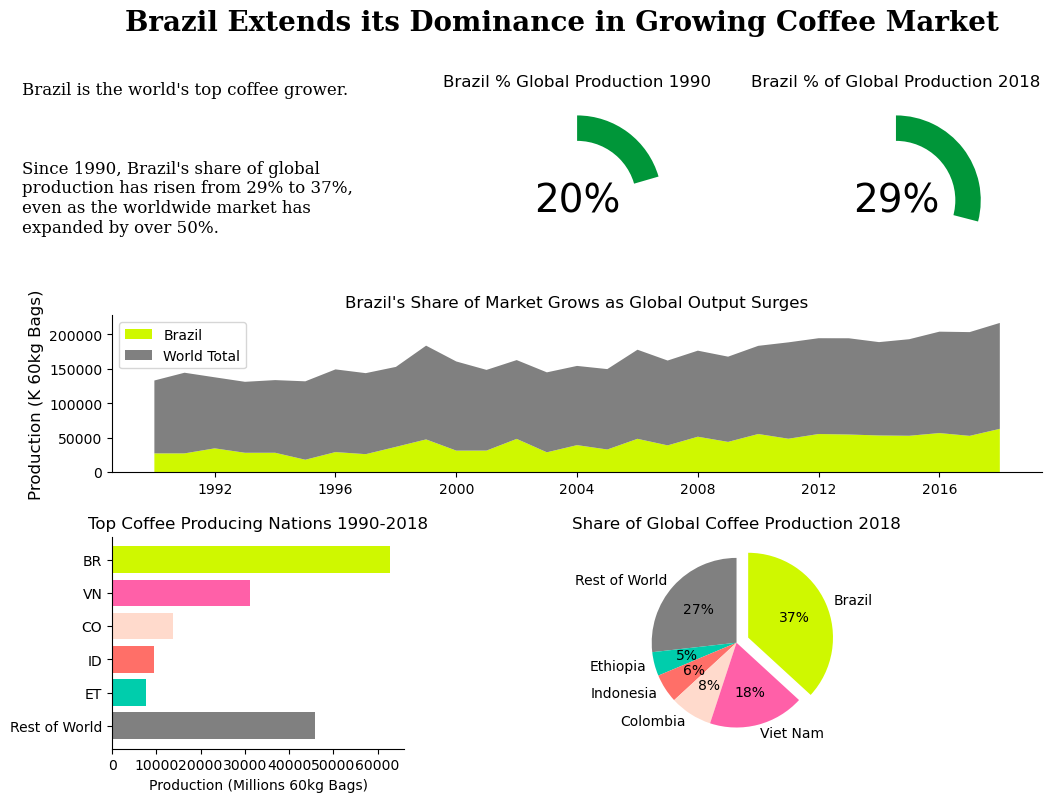

In [36]:
import matplotlib.gridspec as gridspec


fig = plt.figure(figsize=(12, 8.5))

gs = gridspec.GridSpec(nrows=12, ncols=6 )

fig.suptitle("Brazil Extends its Dominance in Growing Coffee Market", 
             fontsize=20, 
             fontweight="bold",
             fontfamily='serif'
            )

fig.text(.05, .695, 
'''Brazil is the world's top coffee grower.



Since 1990, Brazil's share of global 
production has risen from 29% to 37%, 
even as the worldwide market has 
expanded by over 50%.
'''

, fontsize=12, fontweight='light', fontfamily='serif')

ax1 = fig.add_subplot(gs[0:4, 2:4])


ax1.pie(
    brazil_vs_others.iloc[0].sort_values(ascending=False),
    startangle=90,
    labels = ["", ""],
    pctdistance=.85,
    colors=["White", "#009639"]
)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

plt.text(
    0, 
    0, 
    f"{round((brazil_vs_others.loc['1990', 'Brazil'] / brazil_vs_others.loc['1990'].sum()*100))}%", 
    ha='center', 
    va='center', 
    fontsize=28
)
  

ax1.set_title("Brazil % Global Production 1990", fontsize=12)


ax2 = fig.add_subplot(gs[0:4, 4:])


ax2.pie(
    brazil_vs_others.iloc[-1].sort_values(ascending=False),
    startangle=90,
    labels = ["", ""],
    #autopct='%.0f%%',
    pctdistance=.85,
    colors=["White", "#009639"]
)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

plt.text(
    0, 
    0, 
    f"{round((brazil_vs_others.loc['2018', 'Brazil'] / brazil_vs_others.loc['2018'].sum()*100))}%", 
    ha='center', 
    va='center', 
    fontsize=28
)
  

ax2.set_title("Brazil % of Global Production 2018", fontsize=12)



ax3 = fig.add_subplot(gs[4:7, :])

ax3.stackplot(
    brazil_vs_others.index.astype("datetime64[ns]"), 
    brazil_vs_others["Brazil"], 
    brazil_vs_others["rest_of_world"],
    labels=["Brazil", "World Total"],
    colors=["#CFF800", "grey"]
)


ax3.set_title("Brazil's Share of Market Grows as Global Output Surges")

ax3.set_ylabel("Production (K 60kg Bags)", fontsize=12)


ax3.legend(loc="upper left")

ax4 = fig.add_subplot(gs[8:, 0:2])

ax4.barh(y=coffee_production_top5_2018.index[::-1], 
        width=coffee_production_top5_2018.iloc[::-1],
        color=["grey", "#00CDAC", "#FF6F68", "#FFDACC", "#FF60A8", "#CFF800"])


positions = list(range(6))
labels = ["BR", "VN", "CO", "ID", "ET", "Rest of World"][::-1]

ax4.set_title("Top Coffee Producing Nations 1990-2018")
ax4.set_xlabel("Production (Millions 60kg Bags)", fontsize=10)
ax4.set_yticks(positions)
ax4.set_yticklabels(labels)



ax5 = fig.add_subplot(gs[8:, 2:])

ax5.pie(coffee_production_top5_2018[::-1],
       autopct="%.0f%%",
       labels=list(coffee_production_top5_2018.index[::-1]),
       startangle=90,
       colors = ["grey", "#00CDAC", "#FF6F68", "#FFDACC", "#FF60A8", "#CFF800" ],
       explode=(0, 0, 0, 0, 0, .15))

ax5.set_title("Share of Global Coffee Production 2018")

plt.show()

fig.savefig('brazil_stats.png', bbox_inches='tight', facecolor="white")


* Read in `prices-paid-to-growers.csv` and create a subplot grid of histograms showing the distribution of prices paid to the countries Brazil, Colombia, Ethiopia, and one for all other nations.

In [38]:
prices_paid_to_growers = pd.read_csv(r"C:\Users\Lenovo\Desktop\Maven\Data+Viz+with+Matplotlib+&+Seaborn\Data Viz with Matplotlib & Seaborn\Data\coffee\prices-paid-to-growers.csv"
                                    ).T.drop(9, axis=1)

prices_paid_to_growers.columns= prices_paid_to_growers.iloc[0]

prices_paid_to_growers.drop("prices_paid_to_growers", inplace=True)

prices_paid_to_growers["Other Nations"] =  prices_paid_to_growers.drop(["Colombia", "Brazil", "Ethiopia"], axis=1).mean(axis=1)

prices_paid_to_growers.head()

prices_paid_to_growers,Colombia,Dominican Republic,El Salvador,Guatemala,Honduras,India,Uganda,Brazil,Ethiopia,India,Togo,Uganda,Other Nations
1990,1.534724,1.458168,1.116194,1.204956,1.11147,1.473558,0.337598,1.199223,1.348565,0.978921,0.645267,0.166486,0.943624
1991,1.48179,1.382845,0.983322,1.270086,1.238947,1.358371,0.654322,0.97115,1.505322,0.897289,0.632307,0.26143,0.964325
1992,1.204656,1.027841,0.682322,0.888099,0.886057,1.191159,0.441397,0.997768,1.351128,0.877945,0.658494,0.197653,0.761219
1993,1.106477,1.172704,0.780397,0.914552,0.828746,1.278669,0.552298,1.167263,1.362442,0.975912,0.499857,0.259737,0.806986
1994,1.898327,2.478234,2.191177,1.662711,1.800576,1.73081,1.666651,2.52911,2.418234,1.246437,0.573784,0.919709,1.585565


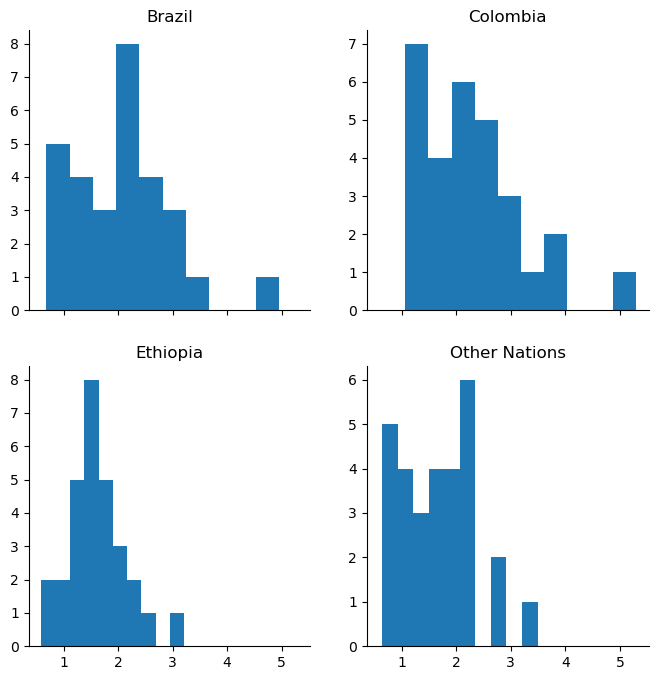

In [39]:
fig, ax = plt.subplots(2, 2, sharex='all', figsize=(8, 8))


ax[0][0].set_title("Brazil")
ax[0][0].hist(prices_paid_to_growers["Brazil"])

ax[0][1].set_title("Colombia")
ax[0][1].hist(prices_paid_to_growers["Colombia"])

ax[1][0].set_title("Ethiopia")
ax[1][0].hist(prices_paid_to_growers["Ethiopia"])

ax[1][1].set_title("Other Nations")
ax[1][1].hist(prices_paid_to_growers["Other Nations"])

plt.show()